# Разработка A/B-тестирования и анализ результатов

Вы работаете продуктовым аналитиком в компании, которая разрабатывает развлекательное приложение с функцией «бесконечной» ленты, как, например, в приложениях с короткими видео. В вашем приложении существует две модели монетизации: первая — ежемесячная платная подписка, которая позволяет пользователям смотреть ленту без рекламы, вторая — демонстрация рекламы для пользователей, которые ещё не оформили подписку.

Команда разработчиков рекомендательных систем создала новый алгоритм рекомендаций, который, по их мнению, будет показывать более интересный контент для каждого пользователя. Вас, как аналитика, просят помочь рассчитать параметры A/B-теста, который позволит проверить эту гипотезу, и проанализировать его результаты.

## Описание данных

Вы будете работать с тремя таблицами:

- `sessions_project_history.csv` — таблица с историческими данными по сессиям пользователей на период с 2025-08-15 по 2025-09-23. Путь к файлу: `/datasets/sessions_project_history.csv`.

- `sessions_project_test_part.csv` — таблица с данными за первый день проведения A/B-теста, то есть за 2025-10-14. Путь к файлу: `/datasets/sessions_project_test_part.csv`.

- `sessions_project_test.csv` — таблица с данными за весь период проведения A/B-теста, то есть с 2025-10-14 по 2025-11-02. Путь к файлу: `/datasets/sessions_project_test.csv`.

У этих таблиц почти совпадает структура и содержание колонок, различаются лишь периоды наблюдения.

Поля таблиц `sessions_project_history.csv`, `sessions_project_test.csv`, `sessions_project_test_part.csv`:

- `user_id` — идентификатор пользователя;

- `session_id` — идентификатор сессии в приложении;

- `session_date` — дата сессии;

- `session_start_ts` — дата и время начала сессии;

- `install_date` — дата установки приложения;

- `session_number` — порядковый номер сессии для конкретного пользователя;

- `registration_flag` — является ли пользователь зарегистрированным;

- `page_counter` — количество просмотренных страниц во время сессии;

- `region` — регион пользователя;

- `device` — тип устройства пользователя;

- `test_group` — тестовая группа (в таблице с историческими данными этого столбца нет).


## Что нужно сделать
Ваши задачи: рассчитать параметры теста, оценить корректность его проведения и проанализировать результаты эксперимента.

### 1. Работа с историческими данными (EDA)

#### 1.1. Загрузка исторических данных
На первом этапе поработайте с историческими данными приложения:

- Импортируйте библиотеку pandas.

- Считайте и сохраните в датафрейм `sessions_history` CSV-файл с историческими данными о сессиях пользователей `sessions_project_history.csv`.

Выведите на экран первые пять строк полученного датафрейма.

In [57]:
import pandas as pd
sessions_history=pd.read_csv('https://code.s3.yandex.net/datasets/sessions_project_history.csv')
display(sessions_history.head())

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device
0,E302123B7000BFE4,F9AF61A0C2023832,2025-08-15,2025-08-15 17:47:35,2025-08-15,1,0,3,CIS,iPhone
1,2530F72E221829FB,85003A206CBDAC6F,2025-08-15,2025-08-15 16:42:14,2025-08-15,1,0,4,MENA,Android
2,876E020A4FC512F5,3677423E49D72DEE,2025-08-15,2025-08-15 12:30:00,2025-08-15,1,0,4,EU,PC
3,2640B349E1D81584,956B45F5915CA225,2025-08-15,2025-08-15 15:31:31,2025-08-15,1,0,4,CIS,Android
4,94E1CBFAEF1F5EE9,83BF0DA35F9F1F40,2025-08-15,2025-08-15 21:33:53,2025-08-15,1,0,3,CIS,Android


#### 1.2. Знакомство с данными
- Для каждого уникального пользователя `user_id` рассчитайте количество уникальных сессий `session_id`.

- Выведите на экран все данные из таблицы `sessions_history` для одного пользователя с наибольшим количеством сессий. Если таких пользователей несколько, выберите любого из них.

- Изучите таблицу для одного пользователя, чтобы лучше понять логику формирования каждого столбца данных.



In [59]:
sessions_history.groupby('user_id')['session_id'].nunique().sort_values(ascending=False)

user_id
10E0DEFC1ABDBBE0    10
6A73CB5566BB494D    10
8A60431A825D035B     9
D11541BAC141FB94     9
5BCFE7C4DCC148E9     9
                    ..
1DF13BB1953B3497     1
628502A3CE7E0A3C     1
1DEEF40DEFBD0C65     1
AC08479B7472C628     1
8A0882B6715D9EE5     1
Name: session_id, Length: 134039, dtype: int64

In [60]:
max_index=sessions_history.groupby('user_id')['session_id'].nunique().sort_values(ascending=False).idxmax()
display(sessions_history[sessions_history['user_id']==max_index])

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device
115558,10E0DEFC1ABDBBE0,B8F0423BBFFCF5DC,2025-08-14,2025-08-14 13:57:39,2025-08-14,1,0,4,CIS,Android
191751,10E0DEFC1ABDBBE0,87CA2FA549473837,2025-08-15,2025-08-15 16:42:10,2025-08-14,2,0,3,CIS,Android
239370,10E0DEFC1ABDBBE0,4ADD8011DCDCE318,2025-08-16,2025-08-16 19:53:21,2025-08-14,3,0,3,CIS,Android
274629,10E0DEFC1ABDBBE0,DF0FD0E09BF1F3D7,2025-08-17,2025-08-17 15:03:43,2025-08-14,4,0,1,CIS,Android
302501,10E0DEFC1ABDBBE0,3C221774B4DE6885,2025-08-18,2025-08-18 17:29:14,2025-08-14,5,0,4,CIS,Android
325557,10E0DEFC1ABDBBE0,031BD7A67048105B,2025-08-19,2025-08-19 13:23:55,2025-08-14,6,0,2,CIS,Android
345336,10E0DEFC1ABDBBE0,FF4315CF4AD4B100,2025-08-20,2025-08-20 19:31:54,2025-08-14,7,0,2,CIS,Android
377532,10E0DEFC1ABDBBE0,4045FEA0747203B4,2025-08-22,2025-08-22 17:54:13,2025-08-14,8,0,2,CIS,Android
403538,10E0DEFC1ABDBBE0,344B086C421C7F37,2025-08-24,2025-08-24 14:46:13,2025-08-14,9,0,2,CIS,Android
414743,10E0DEFC1ABDBBE0,054F20BA371E4C9D,2025-08-25,2025-08-25 18:36:41,2025-08-14,10,0,3,CIS,Android


#### 1.3. Анализ числа регистраций
Одна из важнейших метрик продукта — число зарегистрированных пользователей. Используя исторические данные, визуализируйте, как менялось число регистраций в приложении за время его существования.

- Агрегируйте исторические данные и рассчитайте число уникальных пользователей и число зарегистрированных пользователей для каждого дня наблюдения. Для простоты считайте, что у пользователя в течение дня бывает одна сессия максимум и статус регистрации в течение одного дня не может измениться.

- Постройте линейные графики общего числа пользователей и общего числа зарегистрированных пользователей по дням. Отобразите их на одном графике.

- Постройте отдельный линейный график доли зарегистрированных пользователей от всех пользователей по дням.

- На обоих графиках должны быть заголовок, подписанные оси X и Y, сетка и легенда.

In [62]:
import matplotlib.pyplot as plt

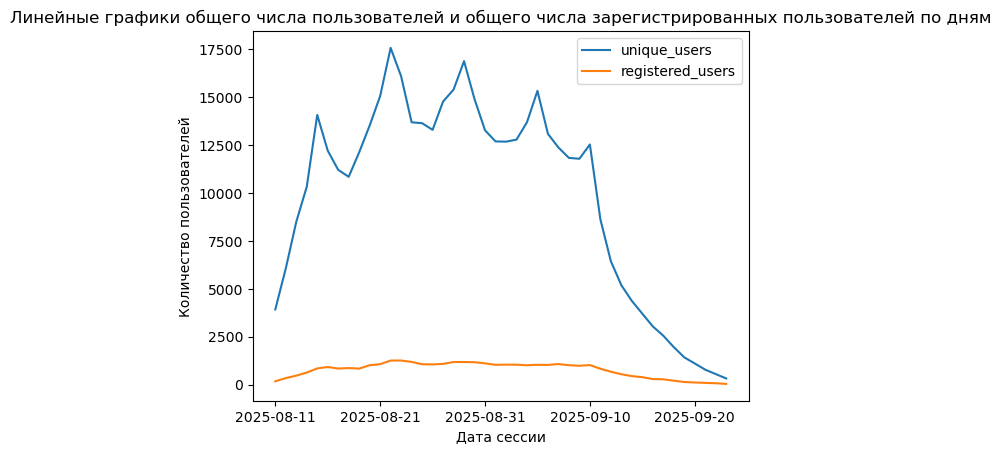

In [63]:
df_agg=sessions_history.groupby('session_date').agg({'user_id': 'nunique', 'registration_flag': 'sum'})\
        .rename(columns= {'user_id':'unique_users', 'registration_flag': 'registered_users'})
df_agg.plot.line()
plt.title('Линейные графики общего числа пользователей и общего числа зарегистрированных пользователей по дням')
plt.xlabel('Дата сессии')
plt.ylabel('Количество пользователей')
plt.legend(loc='upper right')
plt.show()

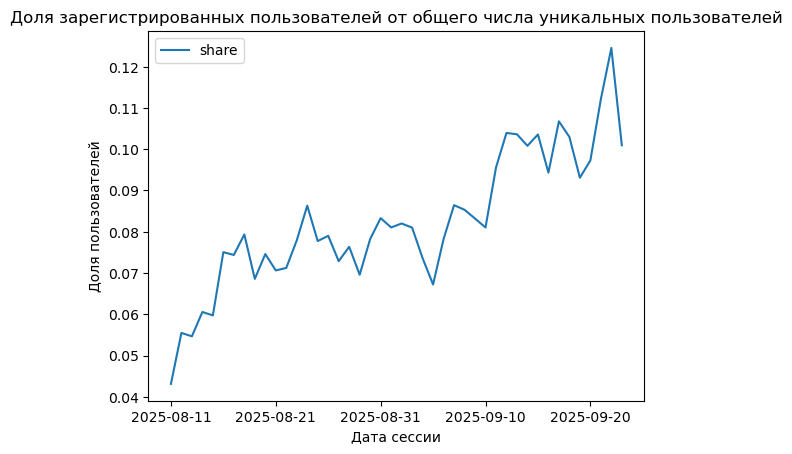

In [64]:
df_agg['share']=df_agg['registered_users']/df_agg['unique_users']
df_agg2=df_agg.reset_index()[['session_date', 'share']]
df_agg2.plot.line(x='session_date', y='share')
plt.title('Доля зарегистрированных пользователей от общего числа уникальных пользователей')
plt.xlabel('Дата сессии')
plt.ylabel('Доля пользователей')
plt.legend(loc='upper left')
plt.show()

#### 1.4. Анализ числа просмотренных страниц
Другая важная метрика продукта — число просмотренных страниц в приложении. Чем больше страниц просмотрено, тем сильнее пользователь увлечён контентом, а значит, выше шансы на то, что он зарегистрируется и оплатит подписку.

- Найдите количество сессий для каждого значения количества просмотренных страниц. Например: одну страницу просмотрели в 29160 сессиях, две страницы в 105536 сессиях и так далее.

- Постройте столбчатую диаграмму, где по оси X будет число просмотренных страниц, по оси Y — количество сессий.

- На диаграмме должны быть заголовок, подписанные оси X и Y.

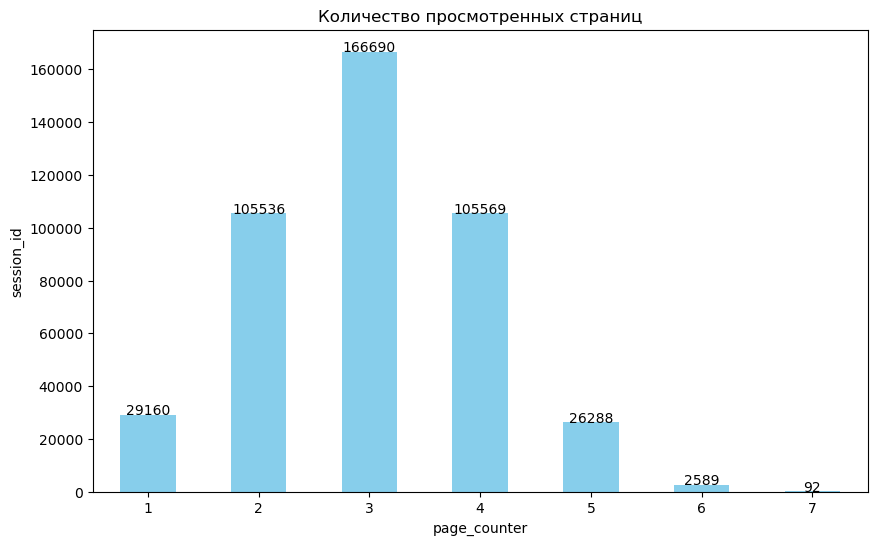

In [66]:
df_page=sessions_history.groupby('page_counter').agg({'session_id':'count'})
df_page.plot(kind='bar', title='Количество просмотренных страниц', \
             legend=False, xlabel='page_counter', ylabel='session_id', rot=0, color='skyblue', figsize=(10,6))
for i, v in enumerate(df_page['session_id']):
    plt.text(i, v + 0.5, str(v), ha='center')
plt.show()

#### 1.5. Доля пользователей, просмотревших более четырёх страниц
Продуктовая команда продукта считает, что сессии, в рамках которых пользователь просмотрел 4 и более страниц, говорят об удовлетворённости контентом и алгоритмами рекомендаций. Этот показатель является важной прокси-метрикой для продукта.

- В датафрейме `sessions_history` создайте дополнительный столбец `good_session`. В него войдёт значение `1`, если за одну сессию было просмотрено 4 и более страниц, и значение `0`, если было просмотрено меньше.

- Постройте график со средним значением доли успешных сессий ко всем сессиям по дням за весь период наблюдения.

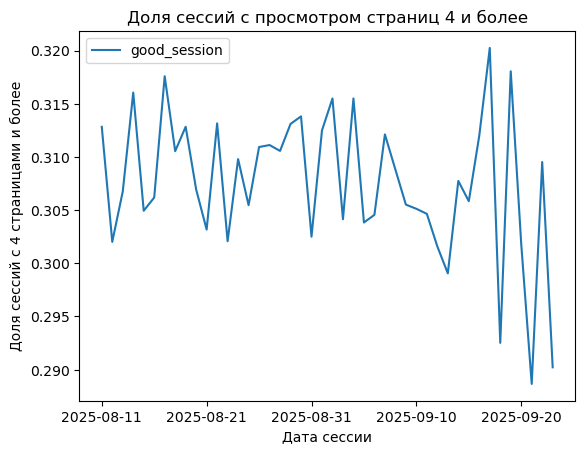

In [68]:
sessions_history['good_session']= sessions_history['page_counter'].apply(lambda x: 1 if x >= 4 else 0)
df_sessions=sessions_history.groupby('session_date').agg({'good_session':'mean'}).reset_index()
df_sessions.plot.line(x='session_date', y='good_session')
plt.title('Доля сессий с просмотром страниц 4 и более')
plt.xlabel('Дата сессии')
plt.ylabel('Доля сессий с 4 страницами и более')
plt.legend(loc='upper left')
plt.show()

### 2. Подготовка к тесту
При планировании теста необходимо проделать несколько важных шагов:

- Определиться с целевой метрикой.

- Рассчитать необходимый размер выборки.

- Исходя из текущих значений трафика, рассчитать необходимую длительность проведения теста.

#### 2.1. Расчёт размера выборки
В рамках курса вам уже приходилось рассчитывать размеры выборки, используя онлайн-калькуляторы. В этом задании предлагаем воспользоваться готовым кодом и рассчитать необходимое для вашего дизайна эксперимента количество пользователей.

Для этого установите в коде ниже следующие параметры:

- Уровень значимости — 0.05.

- Вероятность ошибки второго рода — 0.2.

- Мощность теста.

- Минимальный детектируемый эффект, или MDE, — 3%. Обратите внимание, что здесь нужно указать десятичную дробь, а не процент.

При расчёте размера выборки мы будем использовать метод `solve_power()` из класса `power.NormalIndPower` модуля `statsmodels.stats`.

Запустите ячейку и изучите полученное значение.

In [71]:
from statsmodels.stats.power import NormalIndPower

# Задаём параметры
alpha = 0.05  # Уровень значимости
beta = 0.2  # Ошибка второго рода, часто 1 - мощность
power = 1 - beta  # Мощность теста
mde = 0.03  # Минимальный детектируемый эффект

# Инициализируем класс NormalIndPower
power_analysis = NormalIndPower()

# Рассчитываем размер выборки
sample_size = power_analysis.solve_power(
    effect_size = mde,
    power = power,
    alpha = alpha,
    ratio = 1 # Равномерное распределение выборок
)

print(f"Необходимый размер выборки для каждой группы: {int(sample_size)}")

Необходимый размер выборки для каждой группы: 17441


#### 2.1. Расчёт длительности A/B-теста

Используйте данные о количестве пользователей в каждой выборке и среднем количестве пользователей приложения. Рассчитайте длительность теста, разделив одно на другое.

- Рассчитайте среднее количество уникальных пользователей приложения в день.

- Определите длительность теста, исходя из рассчитанного значения размера выборок и среднего дневного трафика приложения. Количество дней округлите в большую сторону.

In [73]:
from math import ceil

# Среднее количество пользователей приложения в день по историческим данным
df_day=sessions_history.groupby('session_date').agg({'user_id': 'nunique'}).reset_index() 
avg_daily_users = df_day['user_id'].mean()

# Рассчитываем длительность теста в днях как отношение размера выборки к среднему числу пользователей
test_duration = ceil(2*sample_size/avg_daily_users)

print(f"Рассчитанная длительность A/B-теста при текущем уровене трафика в {avg_daily_users} пользователей в день составит {test_duration} дней")

Рассчитанная длительность A/B-теста при текущем уровене трафика в 9907.363636363636 пользователей в день составит 4 дней


### 3. Мониторинг А/В-теста

#### 3.1. Проверка распределения пользователей

A/B-тест успешно запущен, и уже доступны данные за первые три дня. На этом этапе нужно убедиться, что всё идёт хорошо: пользователи разделены правильным образом, а интересующие вас метрики корректно считаются.

- Считайте и сохраните в датафрейм `sessions_test_part` CSV-файл с историческими данными о сессиях пользователей `sessions_project_test_part.csv`.

- Рассчитайте количество уникальных пользователей в каждой из экспериментальных групп для одного дня наблюдения.

- Рассчитайте и выведите на экран процентную разницу в количестве пользователей в группах A и B. Постройте любую удобную визуализацию, на которой можно было бы увидеть возможное различие двух групп.

Для расчёта процентной разницы воспользуйтесь формулой:
$$P = 100 \cdot  \frac{|A − B|}{A}$$

In [88]:
sessions_test_part=pd.read_csv('https://code.s3.yandex.net/datasets/sessions_project_test_part.csv')

In [89]:
df_one=sessions_test_part[sessions_test_part['session_date']=='2025-10-14']
df_dif=df_one.groupby('test_group')['user_id'].nunique()
percentage_difference=100*abs(df_dif.loc['A']-df_dif.loc['B'])/df_dif.loc['A']
print(f"Процентная разница в количестве пользователей в группах A и B за 2025-10-14 составляет {percentage_difference}")

Процентная разница в количестве пользователей в группах A и B за 2025-10-14 составляет 0.7447528774542993


In [90]:
df_one.head()

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device,test_group
0,3404844B53442747,B4901323BD537E45,2025-10-14,2025-10-14 19:28:49,2025-10-14,1,0,3,CIS,Android,B
1,3A2BF4D364E62D89,216FC619308F8788,2025-10-14,2025-10-14 21:11:04,2025-10-14,1,0,3,MENA,iPhone,A
2,79CDAE11E32B1597,EDFCE4AC1A504074,2025-10-14,2025-10-14 21:44:03,2025-10-14,1,0,3,CIS,iPhone,A
3,D6AF8D78297A931F,CF0AC0EEDE92C690,2025-10-14,2025-10-14 19:07:55,2025-10-14,1,0,4,CIS,PC,A
4,37E0CE723AE568E0,2E6ED45E8C86C4E9,2025-10-14,2025-10-14 15:39:44,2025-10-14,1,0,3,CIS,Mac,B


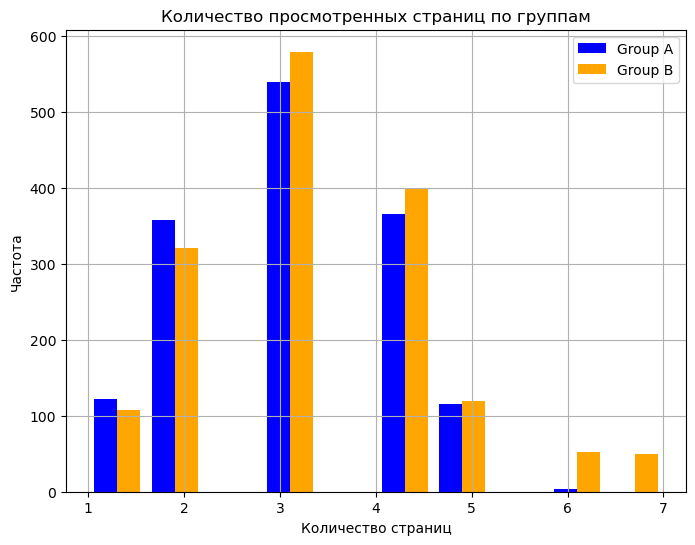

In [91]:
# Строим гистограмму
plt.figure(figsize=(8, 6))
plt.hist([df_one.loc[df_one['test_group'] == 'A', 'page_counter'], df_one.loc[df_one['test_group'] == 'B', 'page_counter']],
         label=['Group A', 'Group B'], color=['blue', 'orange'])
plt.legend()
plt.title('Количество просмотренных страниц по группам')
plt.xlabel('Количество страниц')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

#### 3.2. Проверка пересечений пользователей
Помимо проверки равенства количества пользователей в группах полезно убедиться в том, что группы независимы. Для этого нужно убедиться, что никто из пользователей случайно не попал в обе группы одновременно.

- Рассчитайте количество пользователей, которые встречаются одновременно в группах A и B, или убедитесь, что таких нет.

In [93]:
df_A=df_one[df_one['test_group']=='A']
df_B=df_one[df_one['test_group']=='B']

In [94]:
# Нахождение пересечения по user_id
intersection = pd.merge(df_A, df_B, on='user_id', how='inner')

# Вывод результата
print("Количество пользователей в пересечении:", len(intersection))

Количество пользователей в пересечении: 0


#### 3.3. Равномерность разделения пользователей по устройствам
Полезно также убедиться в том, что пользователи равномерно распределены по всем доступным категориальным переменным — типам устройства и регионам.

Постройте две диаграммы:

- доля каждого типа устройства для пользователей из группы A,

- доля каждого типа устройства для пользователей из группы B.

Постарайтесь добавить на диаграммы все необходимые подписи, пояснения и заголовки, которые позволят сделать вывод о том, совпадает ли распределение устройств в группах A и B.


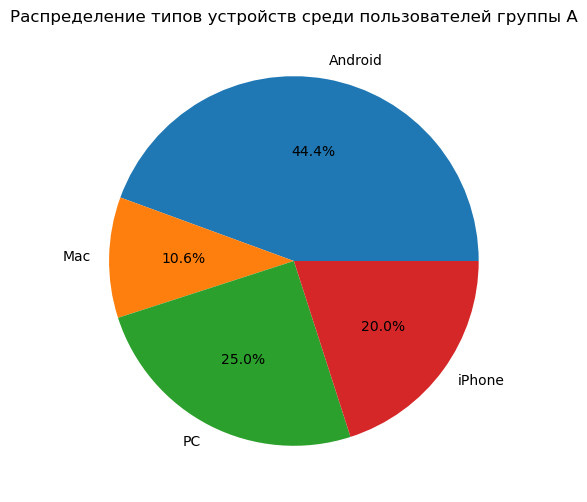

In [96]:
# Подсчет количества каждого типа устройств для группы А
device_counts_A = df_A.groupby('device').agg({'user_id':'nunique'}).reset_index()
y_A=device_counts_A['user_id']
mylabel_A=device_counts_A['device']
# Построение круговой диаграммы
plt.figure(figsize=(8, 6))
plt.pie(y_A, labels=mylabel_A, autopct='%1.1f%%')
plt.title('Распределение типов устройств среди пользователей группы А')
plt.show()

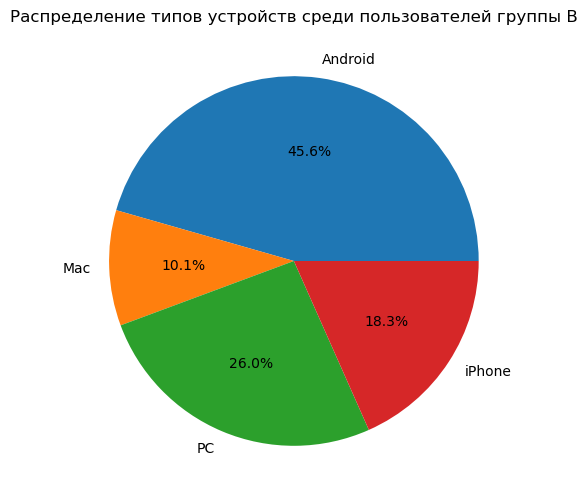

In [97]:
# Подсчет количества каждого типа устройств для группы А
device_counts_B = df_B.groupby('device').agg({'user_id':'nunique'}).reset_index()
y_B=device_counts_B['user_id']
mylabel_B=device_counts_B['device']

# Построение круговой диаграммы
plt.figure(figsize=(8, 6))
plt.pie(y_B, labels=mylabel_B, autopct='%1.1f%%')
plt.title('Распределение типов устройств среди пользователей группы B')
plt.show()

#### 3.4. Равномерность распределения пользователей по регионам
Теперь убедитесь, что пользователи равномерно распределены по регионам.

Постройте две диаграммы:

- доля каждого региона для пользователей из группы A,

- доля каждого региона для пользователей из группы B.

Постарайтесь добавить на диаграммы все необходимые подписи, пояснения и заголовки, которые позволят сделать вывод о том, совпадает ли распределение регионов в группах A и B. Постарайтесь использовать другой тип диаграммы, не тот, что в прошлом задании.


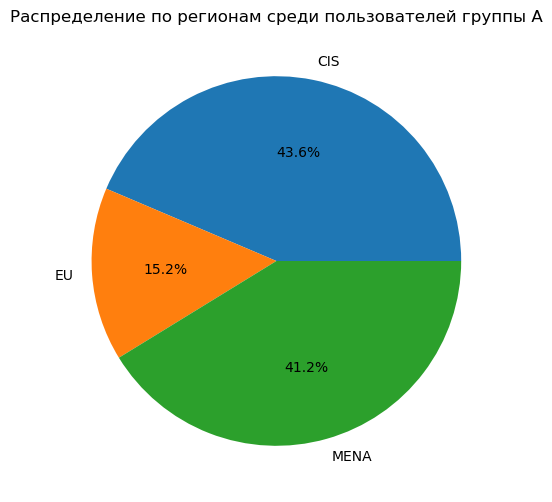

In [99]:
# Подсчет количества каждого типа устройств для группы А
region_counts_A = df_A.groupby('region').agg({'user_id':'nunique'}).reset_index()
yr_A=region_counts_A['user_id']
myregion_A=region_counts_A['region']

# Построение круговой диаграммы
plt.figure(figsize=(10, 6))
plt.pie(yr_A, labels=myregion_A, autopct='%1.1f%%')
plt.title('Распределение по регионам среди пользователей группы А')
plt.show()

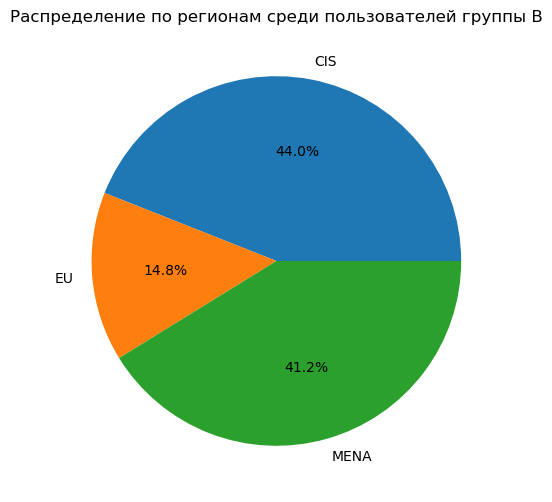

In [100]:
# Подсчет количества каждого типа устройств для группы B
region_counts_B = df_B.groupby('region').agg({'user_id':'nunique'}).reset_index()
yr_B=region_counts_B['user_id']
myregion_B=region_counts_B['region']

# Построение круговой диаграммы
plt.figure(figsize=(8, 6))
plt.pie(yr_B, labels=myregion_B, autopct='%1.1f%%')
plt.title('Распределение по регионам среди пользователей группы B')
plt.show()

In [101]:
#датасет для объединенной диаграммы
df=df_one.pivot_table(index='region', columns='test_group', values='user_id', aggfunc='nunique').reset_index()

<Figure size 1600x1200 with 0 Axes>

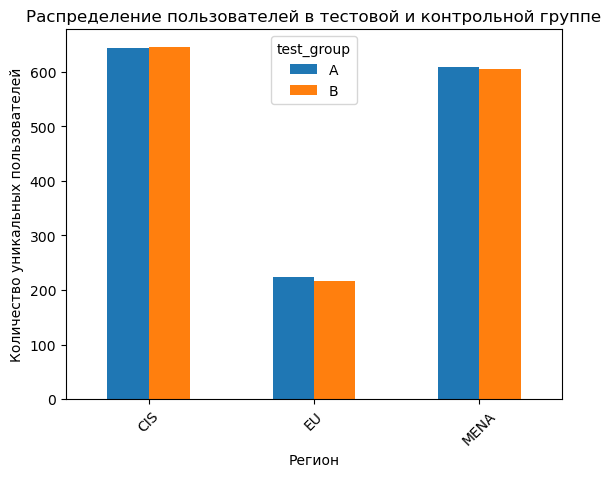

In [102]:
# Строим столбчатую диаграмму
plt.figure(figsize=(16, 12))
df.plot(kind='bar', x='region', y=['A', 'B'])

# Добавляем подписи к осям и заголовок
plt.xlabel('Регион')
plt.ylabel('Количество уникальных пользователей')
plt.title('Распределение пользователей в тестовой и контрольной группе')

# Показываем график

plt.xticks(rotation=45)
plt.legend(title='test_group')
plt.show()

#### 3.5. Вывод после проверки A/B-теста

На основе проведённого анализа A/B-теста сформулируйте и запишите свои выводы. В выводе обязательно укажите:

- Были ли обнаружено различие в количестве пользователей в двух группах.

- Являются ли выборки независимыми. Было ли обнаружено пересечение пользователей из тестовой и контрольной групп.

- Сохраняется ли равномерное распределение пользователей тестовой и контрольной групп по категориальным переменным: устройствам и регионам.

Сделайте заключение о том, корректно ли проходит A/B-тест или наблюдаются какие-либо нарушения.

***Промежуточные выводы***:
- Было обнаружно различие в количестве пользователей в 0,74%
- Выборки являются независимыми, так как пересечения не обнаружено
- По пай-чартам можно сказать, что по устройствам и регионам группы достаточно похожи
- Говоря о том, что различия в количестве пользователей незначительны, выборки независимы можно удтверждать, что А/В тест проходит корректно 

### 4. Проверка результатов A/B-теста

A/B-тест завершён, и у вас есть результаты за все дни проведения эксперимента. Необходимо убедиться в корректности теста и верно интерпретировать результаты.

#### 4.1. Получение результатов теста и подсчёт основной метрики

- Считайте и сохраните в датафрейм `sessions_test` CSV-файл с историческими данными о сессиях пользователей `sessions_project_test.csv`.

- В датафрейме `sessions_test` создайте дополнительный столбец `good_session`. В него войдёт значение `1`, если за одну сессию было просмотрено 4 и более страниц, и значение `0`, если просмотрено меньше.

In [110]:
sessions_test=pd.read_csv('https://code.s3.yandex.net/datasets/sessions_project_test.csv')
sessions_test['good_session']= sessions_test['page_counter'].apply(lambda x: 1 if x >= 4 else 0)

#### 4.2. Проверка корректности результатов теста

Прежде чем приступать к анализу ключевых продуктовых метрик, необходимо убедиться, что тест проведён корректно и вы будете сравнивать две сопоставимые группы.

- Рассчитайте количество уникальных сессий для каждого дня и обеих тестовых групп, используя группировку.

- Проверьте, что количество уникальных дневных сессий в двух выборках не различается или различия не статистически значимы. Используйте статистический тест, который позволит сделать вывод о равенстве средних двух выборок.

- В качестве ответа выведите на экран полученное значение p-value и интерпретируйте его.

In [113]:
# Группируем данные по date и group, считаем уникальные session_id
df_exp = sessions_test.groupby(['session_date', 'test_group'])['session_id'].nunique().reset_index(name='unique_sessions')

In [114]:
from scipy.stats import ttest_ind

***Гипотеза***<br>
H₀ (нулевая гипотеза) — количество уникальных дневных сессий не различается между тестовой и контрольной группами. <br>
H₁ (альтернативная гипотеза) — количество уникальных дневных сессий различается между тестовой и контрольной группами.

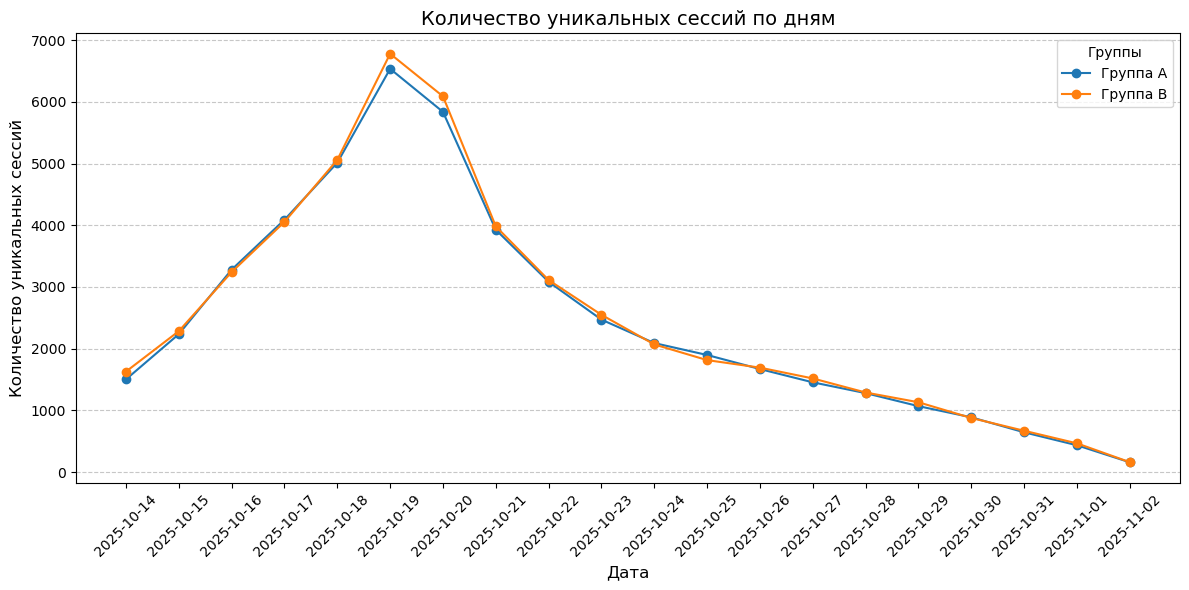

In [116]:
aggregated_data_a=df_exp[df_exp['test_group']=='A']
aggregated_data_b=df_exp[df_exp['test_group']=='B']
# Построение линейной диаграммы
plt.figure(figsize=(12, 6))

# Линия для группы A
plt.plot(aggregated_data_a['session_date'], aggregated_data_a['unique_sessions'], label='Группа A', marker='o')

# Линия для группы B
plt.plot(aggregated_data_b['session_date'], aggregated_data_b['unique_sessions'], label='Группа B', marker='o')

# Настройки графика
plt.title('Количество уникальных сессий по дням', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Количество уникальных сессий', fontsize=12)
plt.legend(title='Группы', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()

# Показ графика
plt.show()

In [117]:
metric_a = df_exp[df_exp.test_group=='A']['unique_sessions'] ## выборка целевой метрики для группы A
metric_b = df_exp[df_exp.test_group=='B']['unique_sessions'] ## выборка целевой метрики для группы B

alpha = 0.05 ## на каком уровне значимости проверяем гипотезу о равенстве выборочных средних
stat_ttest, p_value_ttest = ttest_ind(
    metric_a, 
    metric_b, 
    alternative='two-sided' ## поскольку альтернативная гипотеза о том, что выборочное среднее первой выборки(metric_a) не равно второй выборки
) ## применяем тест Стьюдента (классический T-test)

if p_value_ttest>alpha:
    print(f'p-value теста Стьюдента = {round(p_value_ttest, 2)}')
    print('Нулевая гипотеза находит подтверждение! Выборочные средние в группах A и B равны')
    print('Интерпретация: новый алгоритм рекомендаций не увеличил количество уникальных сессий')
else:
    print(f'p-value теста Стьюдента ={round(p_value_ttest, 2)}')
    print('Нулевая гипотеза не находит подтверждения! Выборочные средние в группах A и B не равны, и в группе B больше')
    print('Интерпретация: новый алгоритм рекомендаций увеличил количество уникальных сессий')

p-value теста Стьюдента = 0.94
Нулевая гипотеза находит подтверждение! Выборочные средние в группах A и B равны
Интерпретация: новый алгоритм рекомендаций не увеличил количество уникальных сессий


#### 4.3. Сравнение доли успешных сессий

Когда вы убедились, что количество сессий в обеих выборках не различалось, можно переходить к анализу ключевой метрики — доли успешных сессий.

Используйте созданный на первом шаге задания столбец `good_session` и рассчитайте долю успешных сессий для выборок A и B, а также разницу в этом показателе. Полученный вывод отобразите на экране.

In [119]:
n_a = sessions_test[ # посчитайте размер группы A
   sessions_test.test_group=='A'
].shape[0] 

n_b = sessions_test[ # посчитайте размер группы B
    sessions_test.test_group=='B'
].shape[0]

m_a = sessions_test[ # посчитайте кол-во успехов в группе A
    (sessions_test.test_group=='A')&(sessions_test.good_session==1)
].shape[0] 

m_b = sessions_test[ # посчитайте количество успехов в группе B
     (sessions_test.test_group=='B')&(sessions_test.good_session==1)
].shape[0]

p_a, p_b = m_a/n_a, m_b/n_b # посчитайте доли успехов для каждой группы: A и B
dif=p_b-p_a

In [120]:
#Сравненние доли успешых сессий
print(f'Доля успешных сессий в группе A = {round(p_a,3)}')
print(f'Доля успешных сессий в группе B = {round(p_b,3)}')
print(f'Разница составляет {round(dif,3)}')


Доля успешных сессий в группе A = 0.308
Доля успешных сессий в группе B = 0.318
Разница составляет 0.011


#### 4.4. Насколько статистически значимо изменение ключевой метрики

На предыдущем шаге вы убедились, что количество успешных сессий в тестовой выборке примерно на 1.1% выше, чем в контрольной, но делать выводы только на основе этого значения будет некорректно. Для принятия решения всегда необходимо отвечать на вопрос: является ли это изменение статистически значимым.

- Используя статистический тест, рассчитайте, является ли изменение в метрике доли успешных сессий статистически значимым.

- Выведите на экран полученное значение p-value и свои выводы о статистической значимости. Напомним, что уровень значимости в эксперименте был выбран на уровне 0.05.

In [122]:
from statsmodels.stats.proportion import proportions_ztest

#### 4.5. Вывод по результатам A/B-эксперимента

На основе проведённого анализа результатов теста сформулируйте и запишите свои выводы для команды разработки приложения. В выводе обязательно укажите:

- Характеристики проведённого эксперимента, количество задействованных пользователей и длительность эксперимента.

- Повлияло ли внедрение нового алгоритма рекомендаций на рост ключевой метрики и как.

- Каким получилось значение p-value для оценки статистической значимости выявленного эффекта.

- Стоит ли внедрять новоовведение в приложение.

***Гипотеза***<br>
H₀ (нулевая гипотеза) — вероятности успеха в тестовой и контрольной группе одинаковы <br>
H₁ (альтернативная гипотеза) — вероятность успеха в тестовой группе выше, чем в контрольной группе.

In [125]:
alpha = 0.05  ## установите уровень значимости

stat_ztest, p_value_ztest = proportions_ztest( # проведите Z-тест пропорций
    [m_a, m_b],
    [n_a, n_b],
    alternative='smaller'
)

print(f'pvalue={p_value_ztest}') # выведите полученное p-value 

if p_value_ztest > alpha:
    print('Нулевая гипотеза находит подтверждение!')
    print('Интерпретация: новый алгоритм рекомендаций не увеличил ключевую метрику — долю успешных сессий')
else:
    print('Нулевая гипотеза не находит подтверждения!')
    print('Интерпретация: новый алгоритм рекомендаций увеличил ключевую метрику — долю успешных сессий')

pvalue=0.0001574739988036123
Нулевая гипотеза не находит подтверждения!
Интерпретация: новый алгоритм рекомендаций увеличил ключевую метрику — долю успешных сессий


***Выводы***:
- В эксперименте было задействовано 100 005 пользователей, эксперимент продолжался 20 дней
- Внедрение нового алгоритма привело к росту ключевой метрики. Изменение в метрике доли успешных сессий статистически значимо, то есть тестируемое изменение оказывает влияние.
- p-value получилось равным 0.00015
- Нововведение можно внедрять, так как оно оказало статистически значимый эффект на ключевую метрику